In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("train_.csv")
df1.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Exploratory Data Analysis

In [3]:
df1.shape

(10656, 10)

In [4]:
df1.columns

Index(['ID', 'area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    7009
Built-up  Area          1927
Plot  Area              1651
Carpet  Area              69
Name: count, dtype: int64

# Drop Unecessary Features

In [9]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(10656, 6)

# Data Cleaning

In [10]:
df2.isnull().sum()

ID             0
location       1
size          14
total_sqft     0
bath          65
price          0
dtype: int64

In [11]:
df2.shape

(10656, 6)

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

ID            0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3.shape

(10590, 6)

In [14]:
df3.head()

,ID,location,size,total_sqft,bath,price
0,0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,2,Uttarahalli,3 BHK,1440,2.0,62.00
3,3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,4,Kothanur,2 BHK,1200,2.0,51.00


# Feature Engineering

In [18]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

/tmp/ipykernel_4859/2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13])

In [19]:
df3.bhk.value_counts()

bhk
2     4426
3     3847
4     1117
1      531
5      280
6      175
7       77
8       68
9       48
10      10
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
Name: count, dtype: int64

# Explore Total SQFT Feature

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,ID,location,size,total_sqft,bath,price,bhk
30,30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


# Above data shows that total sqft can be a range. For such cases we can just take average of min and max value in the range. There are other cases where values are in sqm which can be converted to sqft using unit conversion

In [22]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [24]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

,ID,location,size,total_sqft,bath,price,bhk
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df4.loc[30]

ID                   30
location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

# Add New Feature called price per sqft

In [27]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,ID,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
df5.to_csv("Bangalore_house_price.csv",index=False)

# Examine locations which is a categorical variable. We need to apply the dimensionality reduction technique here to reduce the number of locations

In [29]:
df5.location = df5.location.apply(lambda x:x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                426
Sarjapur  Road            297
Electronic City           236
Kanakpura Road            209
Thanisandra               179
                         ... 
Sahyadri Layout             1
Laxminarayana Layout        1
Kanakadasa Layout           1
Indira Nagar 3rd Stage      1
Panathur Road,              1
Name: count, Length: 1180, dtype: int64

In [30]:
location_stats.values.sum()

10550

# Any location with less than 10 data points should be tagged as "Other" location. 

In [33]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Badavala Nagar            10
Bannerghatta              10
Banjara Layout            10
Murugeshpalya             10
Vishwapriya Layout        10
                          ..
Sahyadri Layout            1
Laxminarayana Layout       1
Kanakadasa Layout          1
Indira Nagar 3rd Stage     1
Panathur Road,             1
Name: count, Length: 975, dtype: int64

In [34]:
len(df5.location.unique())

1180

In [35]:
df5.location = df5.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

206

In [36]:
df5.head()

,ID,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [37]:
# Outlier removal using Business Logic
df5[df5.total_sqft/df5.bhk<300].head()

,ID,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [38]:
# Check the above data points for clear Data errors

In [39]:
df5.shape

(10550, 8)

In [40]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(9949, 8)

In [41]:
# Outlier removal using standard deviation and mean

df6.price_per_sqft.describe()

count      9949.000000
mean       6306.616198
std        4206.909823
min         267.829813
25%        4217.325228
50%        5307.219662
75%        6921.140940
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
# remove outliers

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [43]:
df7 = remove_pps_outliers(df6)
df7.shape

(8220, 8)

In [44]:
# Lets check in a given location how does the 2BHK and 3 BHK Prices Look Like

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price in Lakhs (INR)")
    plt.title(location)
    plt.legend()

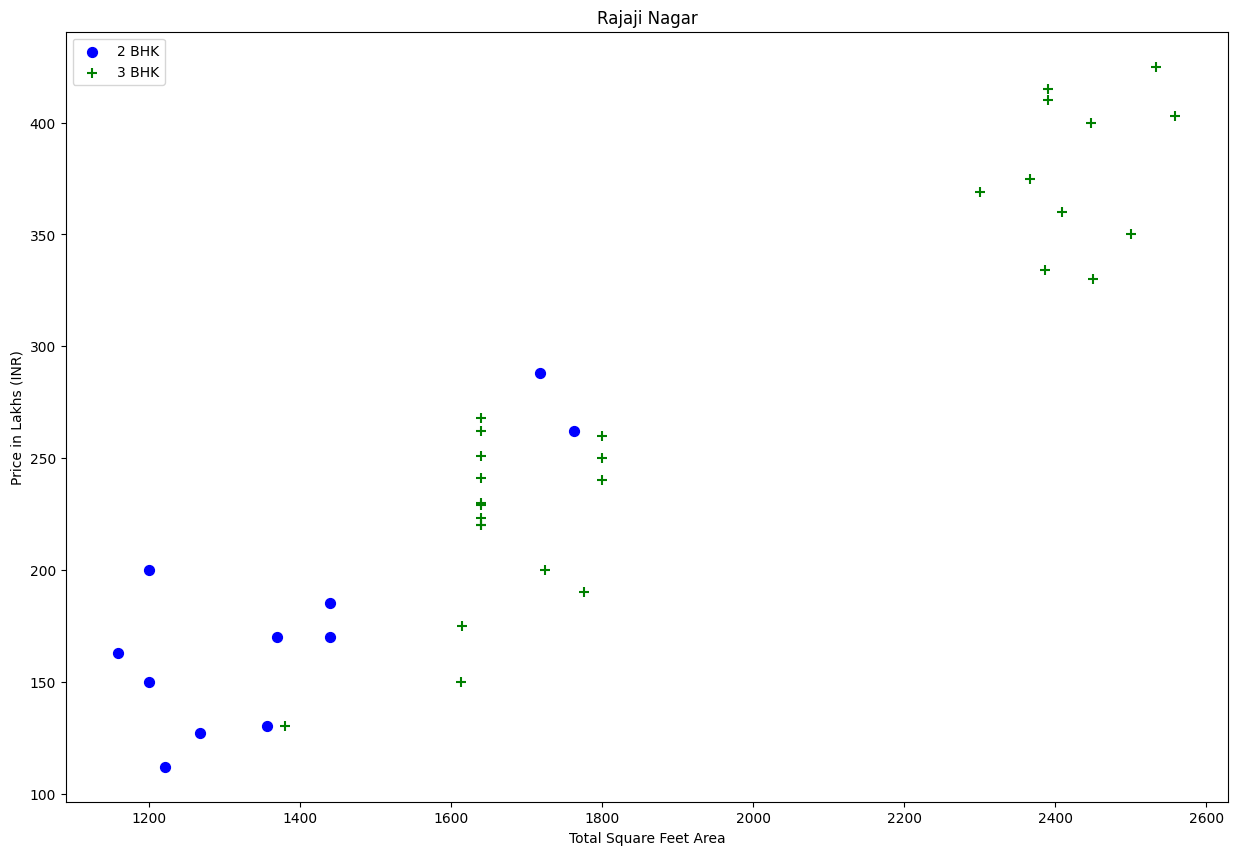

In [45]:
plot_scatter_chart(df7,"Rajaji Nagar")

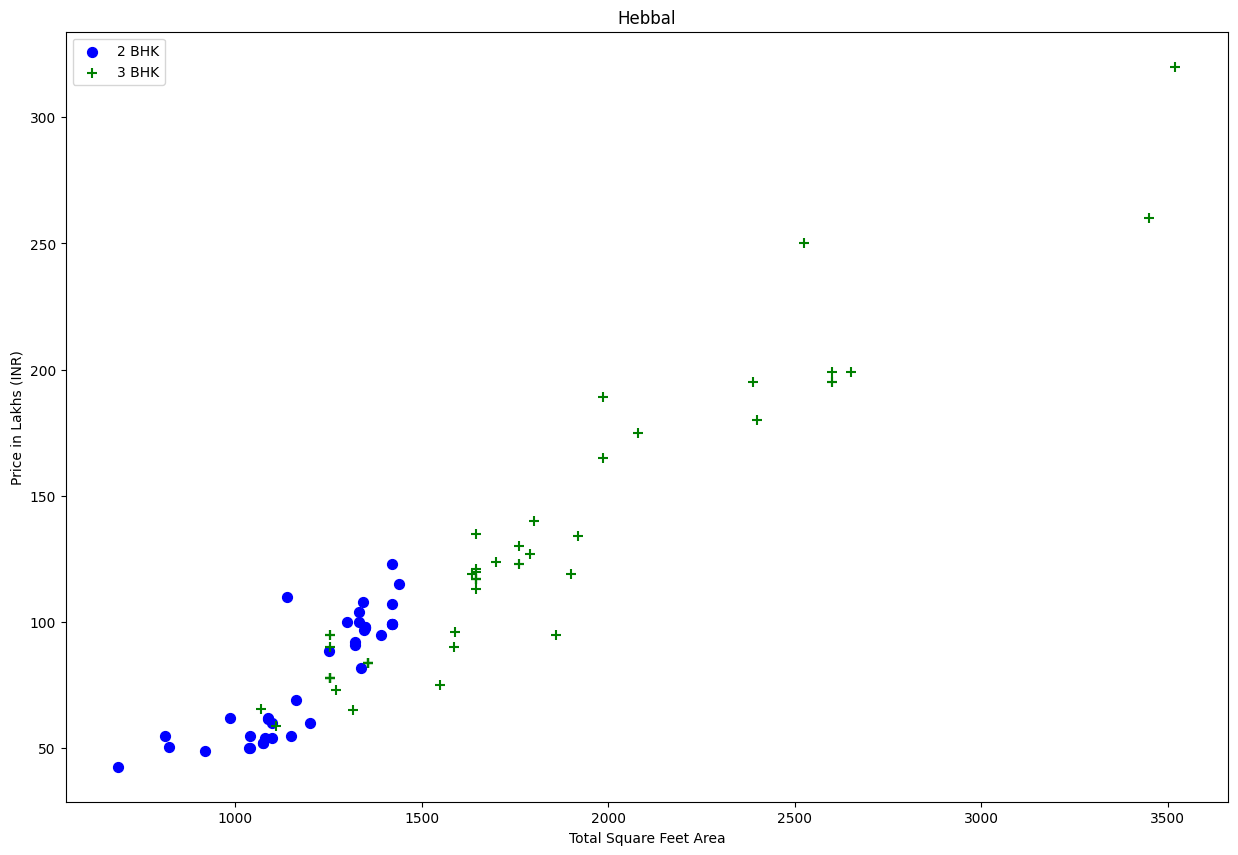

In [46]:
plot_scatter_chart(df7,"Hebbal")

In [50]:
# We can remove those 2 BHK apratments whose price per square feet is less than the mean price per sq ft of 1 BHK apartment

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [51]:
df8 = remove_bhk_outliers(df7)

df8.shape

(5799, 8)

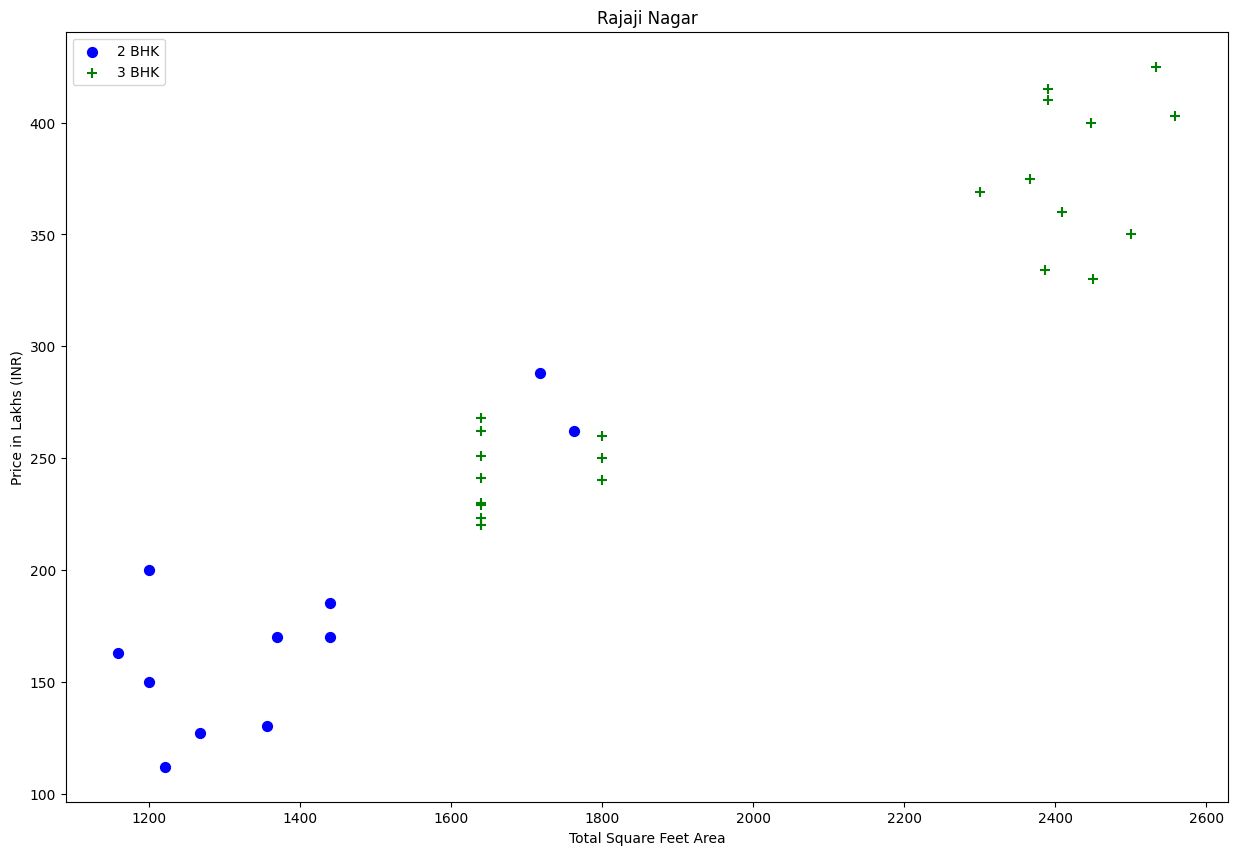

In [52]:
plot_scatter_chart(df8,"Rajaji Nagar")

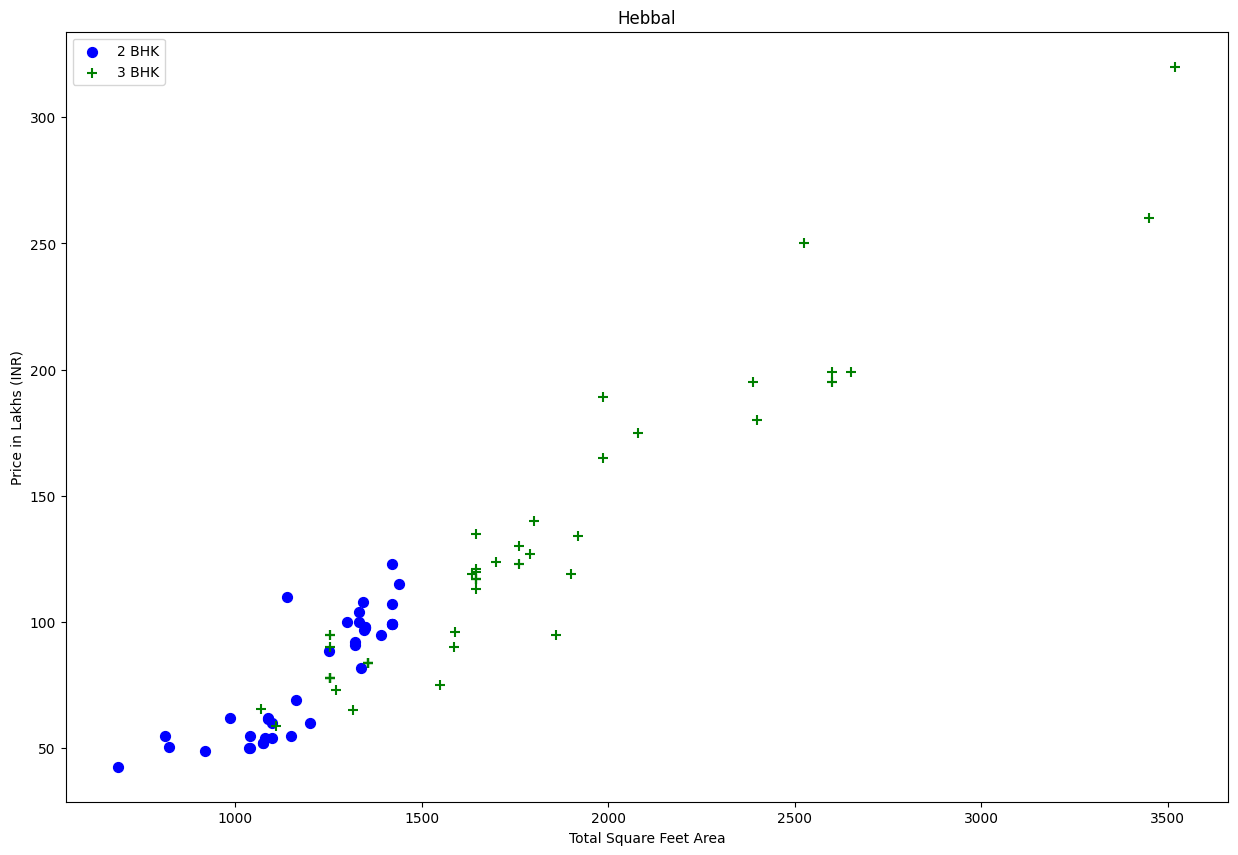

In [53]:
plot_scatter_chart(df7,"Hebbal")

In [54]:
#Outlier removal using bathrooms feature

df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [55]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(5741, 8)

In [56]:
df9.head()

,ID,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,210,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,848,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,2152,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,7138,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,7358,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [57]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)


,ID,location,total_sqft,bath,price,bhk
0,210,1st Block Jayanagar,2850.0,4.0,428.0,4
1,848,1st Block Jayanagar,1630.0,3.0,194.0,3
2,2152,1st Block Jayanagar,1875.0,2.0,235.0,3


In [58]:
# One hot encoding for location

dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,...,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,ID,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,210,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,848,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2152,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7138,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7358,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df12 = df11.drop('location',axis='columns')
df12.head()

,ID,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,210,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,848,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2152,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7138,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,7358,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
df12.shape

(5741, 210)

In [62]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,ID,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,210,2850.0,4.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,848,1630.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2152,1875.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
X.shape

(5741, 209)

In [65]:
y=df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [71]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7886569389701974

In [73]:
# Use K Fold Cross Validation to measure Accuracy of our linear Regression Model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82620509, 0.80849215, 0.75611701, 0.85828343, 0.87430263])

# Above We can see that in 5 iterations we get a score above 80% all the time.

In [81]:
# find Best model using grid search CV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear-regression': {
            'model':LinearRegression(),
            'params':{
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }},
        'lasso': {
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
        }
            },
        'decision-tree':{
            'model' : DecisionTreeRegressor(),
            'params': {
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [82]:
find_best_model_using_gridsearchcv(X,y)

/home/nksys/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nksys/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nksys/.local/lib/python3.9/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/home/nksys/.local/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/home/nksys/.local/lib/pyth

,model,best_score,best_params
0,linear-regression,0.825774,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.707042,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision-tree,0.694262,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [89]:
# above results indicate that linear regression gives the best score

def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [90]:
predict_price('Indira Nagar',1000,3,3)

/home/nksys/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.62034660914799

In [91]:
predict_price('Indira Nagar',1000,2,2)

/home/nksys/.local/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.44452241720889

In [92]:
import pickle 
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)